In [71]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import *
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import scipy.cluster.hierarchy as hcluster
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy.cluster.hierarchy import dendrogram, linkage
from __future__ import print_function
import graphviz, tempfile
import os
import subprocess
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [24]:
CibersortDF = pd.read_csv('Predictors.csv', sep=',')

In [25]:
CibersortDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,BC_01,BC_02,BC_03,BC_03LN,BC_04,BC_05,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11
0,TCGA-AQ-A0Y5,Stage IIIA,0.015420,0.000000,0.139950,0.000000,0.169214,0.302614,0.000000,0.000000,0.0,0.341549,0.000000,0.031253,0.000000
1,TCGA-E9-A22H,Stage IIB,0.273307,0.183923,0.040314,0.127861,0.000000,0.195873,0.000000,0.035424,0.0,0.000000,0.143297,0.000000,0.000000
2,TCGA-AR-A254,Stage IIIA,0.000000,0.000000,0.000000,0.052432,0.171384,0.411419,0.000000,0.000000,0.0,0.011500,0.353264,0.000000,0.000000
3,TCGA-EW-A1IW,Stage IIB,0.203072,0.000000,0.052599,0.063819,0.001051,0.326592,0.034843,0.091170,0.0,0.226853,0.000000,0.000000,0.000000
4,TCGA-E9-A1N9,Stage IIA,0.135903,0.000000,0.166241,0.174241,0.000000,0.268617,0.000000,0.124163,0.0,0.000000,0.000000,0.000000,0.130834


In [26]:
CibersortDF = CibersortDF.drop(['CASE_ID'], axis=1)

In [27]:
#CibersortDF = CibersortDF.drop(['Input Sample', 'P-value', 'Pearson Correlation', 'RMSE'], axis=1)

In [28]:
#CibersortDF = CibersortDF.reset_index()

In [29]:
mapping = {'Stage I': 1, 'Stage IA': 2, 'Stage II': 3, 'Stage IIA': 4, 'Stage IIB':5, 'Stage IIIA':6, 'Stage IIIB':7, 'Stage IIIC':8, 'Stage IV':9, 'Stage X':10 }

In [30]:
CibersortDF = CibersortDF.replace({'AJCC_PATHOLOGIC_TUMOR_STAGE': mapping})

In [31]:
features = ['BC_01', 'BC_02', 'BC_03',
       'BC_03LN', 'BC_04', 'BC_05', 'BC_06', 'BC_07', 'BC_07LN', 'BC_08',
       'BC_09', 'BC_10', 'BC_11']

In [32]:
y = CibersortDF['AJCC_PATHOLOGIC_TUMOR_STAGE']
X = CibersortDF[features]

In [33]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)

In [34]:
dt.fit(X, y)

In [72]:
dot_data = StringIO()

In [73]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [74]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

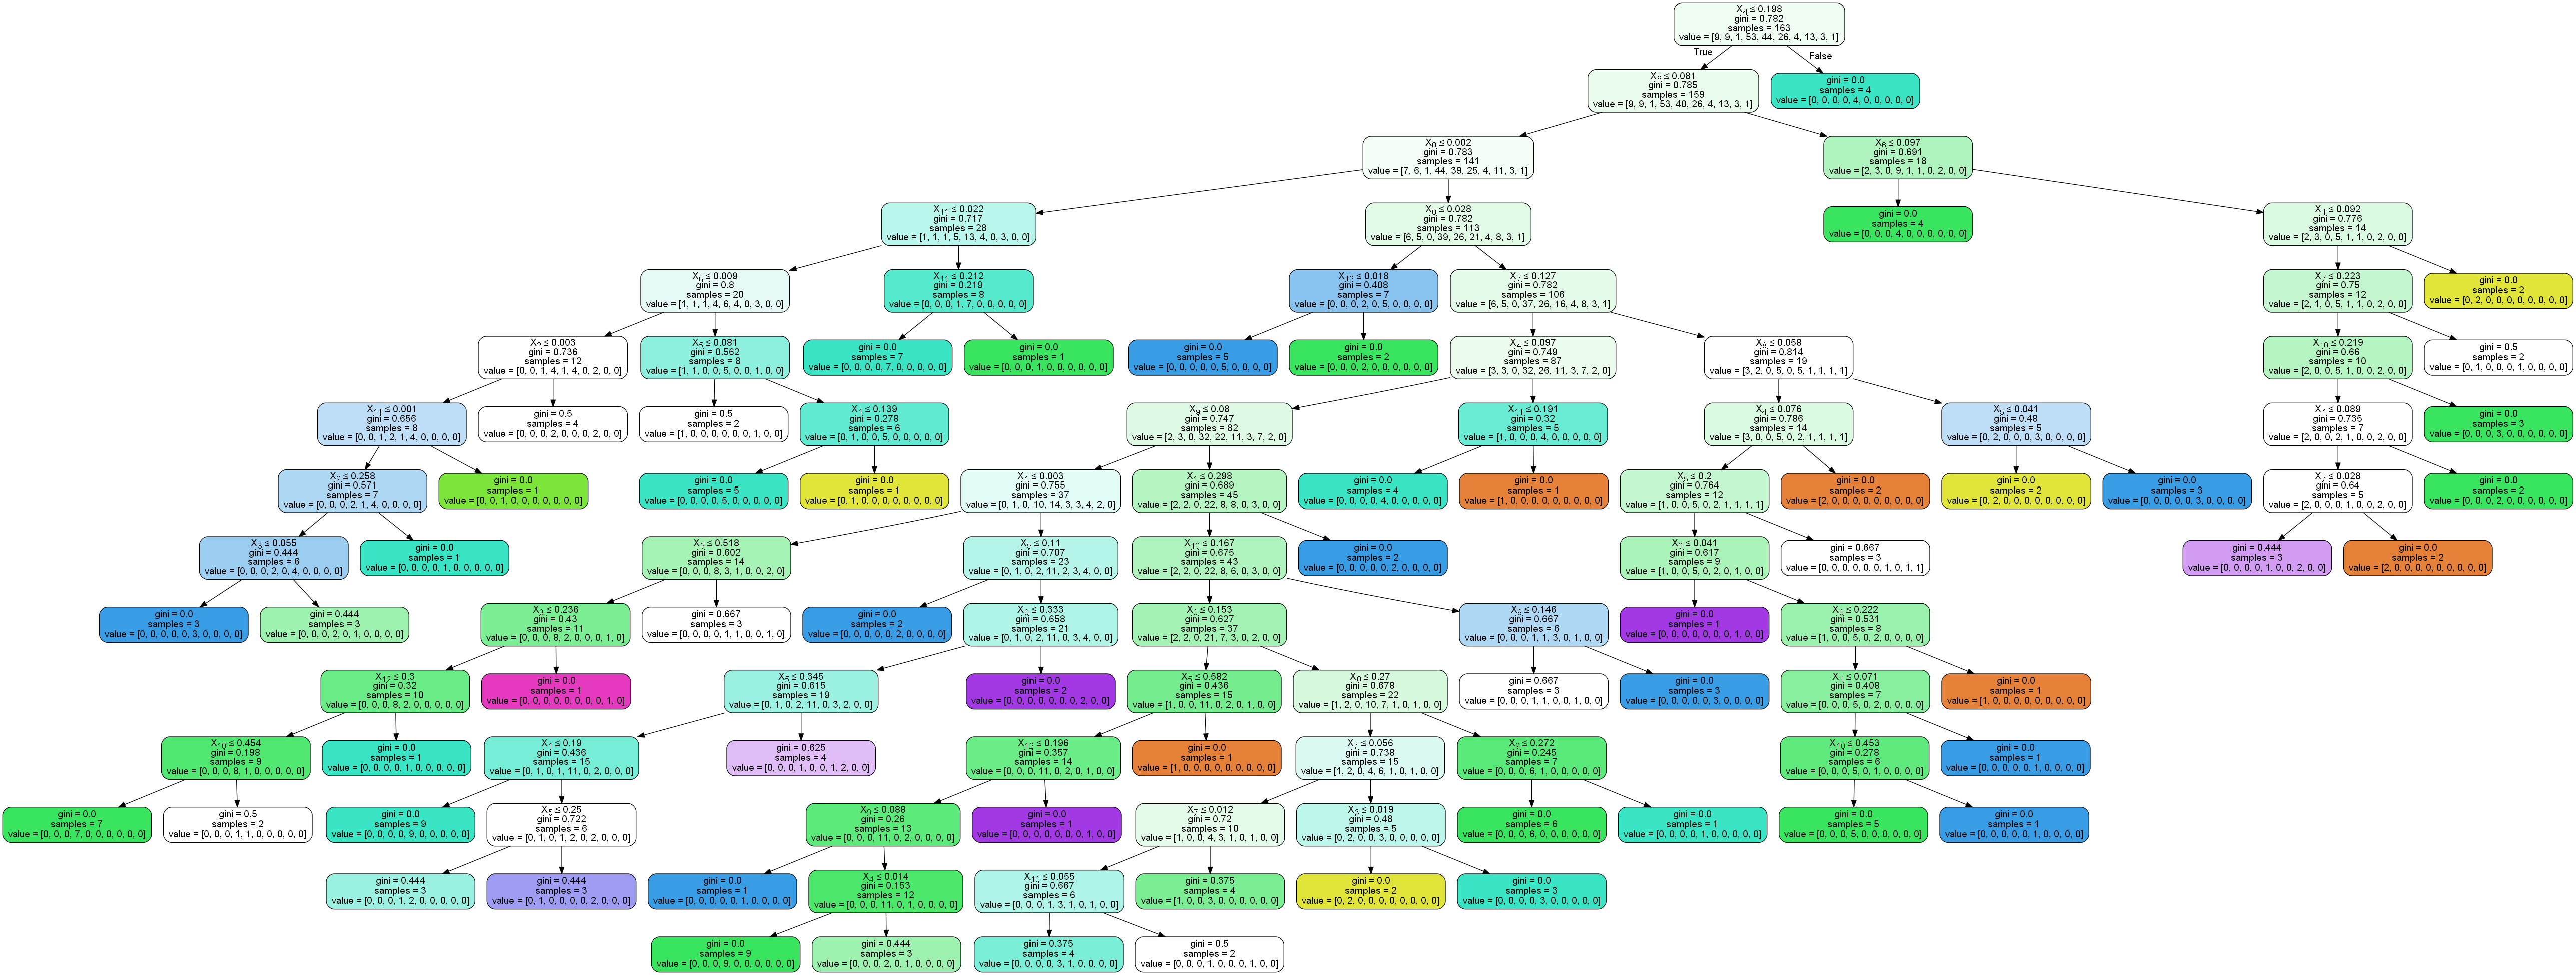

In [75]:
Image(graph.create_png())

In [35]:
'''def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
'''

In [36]:
#visualize_tree(dt, features)

In [37]:
#dot_data = export_graphviz(dt, out_file=None)

In [38]:
#graph = graphviz.Source(dot_data)

In [76]:
#graph.render()

# Dendogram

In [57]:
Z = linkage(CibersortDF)

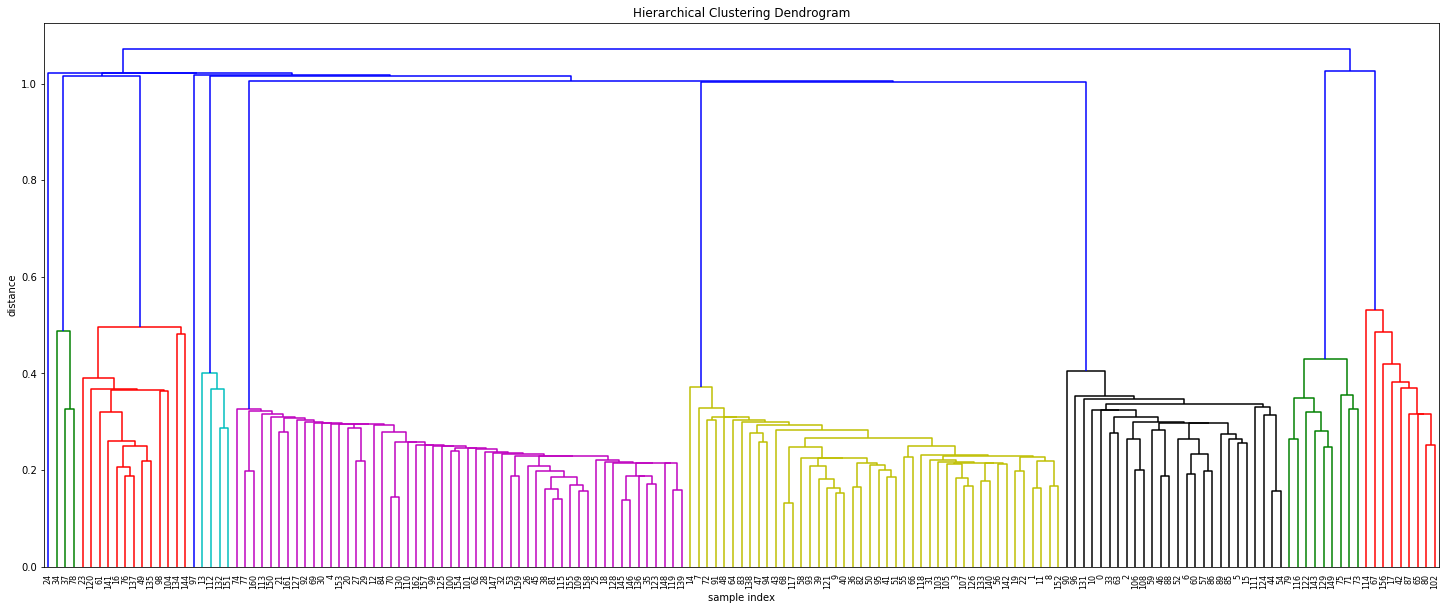

In [61]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

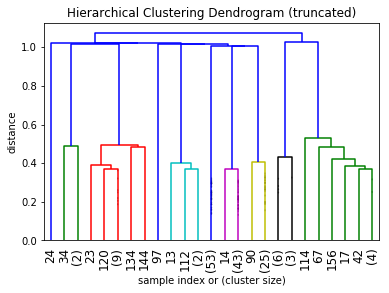

In [63]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Hierarchical and K-means Clustering

In [40]:
df = np.array(CibersortDF)

In [41]:
thresh = 1.5
clusters = hcluster.fclusterdata(df, thresh, criterion="distance")

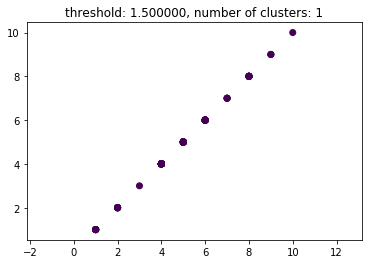

In [42]:
plt.scatter(df[:,0], df[:,0], c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

In [49]:
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
y_kmeans = km.predict(df)

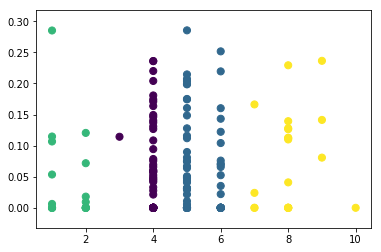

In [51]:
plt.scatter(df[:, 0], df[:, 4], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);